In [ ]:
## Grover's Algorithm
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
#from matplotlibDrawer import matplotlib
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np

def oracle(g_circuit,q,a):
    g_circuit.barrier(label='before Oracle')
    g_circuit.ccx(q[0],q[1],a[0])
    g_circuit.barrier(label='after Oracle')
    return g_circuit

n=2 # number of qubits
k=1 # number of solutions
optimal_iterations = np.floor((np.pi/4)*np.sqrt(2**n/k))
q = QuantumRegister(n,'q')
a = QuantumRegister(1,'ancilla')
c = ClassicalRegister(n,'c')
g_circuit = QuantumCircuit(q, a, c)

g_circuit.x(a)
g_circuit.barrier(label='after X Gate')

g_circuit.h(list(range(n+1)))

for _ in range(1): # number of iterations
    g_circuit.compose(oracle(g_circuit, q, a))
    g_circuit.h(q)
    g_circuit.x(q)
    g_circuit.h(q[n-1])
    g_circuit.cx(q[0],q[1])
    g_circuit.h(q[n-1])
    g_circuit.x(q)
    g_circuit.h(q)

g_circuit.barrier(label='before Measurement')
g_circuit.measure(q,c)
g_circuit.draw(output='mpl',reverse_bits=True,cregbundle=True)

In [ ]:
job = AerSimulator().run(g_circuit,shots=1024)
counts = job.result().get_counts(g_circuit)
print(counts)
plot_histogram(counts)

In [ ]:
##PROBLEM - 2
#Problem Definition 
#We define the total # of items in our search space and identify winning or marked item 

N=20 # total items
winning_item = 16 # wanted item

print(f"Search Space Size: {N}")
print(f"list of items: {list(range(N))}")
print(f"Winning Item(in Binary): {format(winning_item, f'0{5}b')[::-1]}")
print(f"Winning Item(in Decimal): {winning_item}")

In [ ]:
import math
# Calculate number of qubits needed
k=1
num_qubits = math.ceil(math.log2(N))
optimal_iterations = np.floor((np.pi/4)*np.sqrt(num_qubits/k))
print(f"Number of qubits needed: {num_qubits}")
print(f"Optimal number of iterations: {optimal_iterations}")

In [ ]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
#from matplotlibDrawer import matplotlib
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np

q= QuantumRegister(num_qubits,'q')
a= QuantumRegister(1,'a')
c= ClassicalRegister(num_qubits,'c')
qc= QuantumCircuit(q,a,c)

qc.x(a)
qc.barrier()

qc.h(list(range(num_qubits+1)))
qc.barrier(label='before oracle')

for _ in range(optimal_iterations):
    # Oracle fn
    for i in range(num_qubits):
        if format(winning_item, f'0{num_qubits}b')[::-1][i] == '0':
            qc.x(q[i]) 
        qc.mcx(list(q),a[0]) # multi-controlled X (Toffoli) gate
    for i in range(num_qubits):
        if format(winning_item, f'0{num_qubits}b')[::-1][i] == '0':
            qc.x(q[i])
    qc.barrier(label='after oracle')
    qc.h(q)
    qc.x(q)
    qc.barrier(list(q[0:num_qubits-1]))
    qc.h(q[num_qubits-1])
    qc.mcx(list(q[0:num_qubits-1]),q[num_qubits-1])
    qc.h(q[num_qubits-1])
    qc.x(q)
    qc.h(q)

    qc.compose
qc.barrier()
qc.measure(q,c)

qc.draw(output='mpl',reverse_bits=True,cregbundle=True)

In [ ]:
job = AerSimulator().run(g_circuit,shots=1024)
counts = job.result().get_counts(g_circuit)
print(counts)
plot_histogram(counts)

In [ ]:
##NEW Problem - 3
import math
N=20
target=[3,4,15]
k=len(target) #Number of solutions
optimal_iterations= math.floor((math.pi/4)*math.sqrt(N/k))
n=math.ceil(math.log2(N))
print(f"Number of qubits needed: {n}")
print(f"Optimal number of iterations: {optimal_iterations}")

In [ ]:
#Generalization of Oracle

def oracle(N,target):
    n=math.ceil(math.log2(N))
    qc= QuantumCircuit(n+1)
    for t in target:
        binary_target = format(t, f'0{n}b')[::-1]
    for i in range(optimal_iterations):
        if winning_binary[i] =='0':
            qc.x(q[i])  


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q= QuantumRegister(n,'q')
a= QuantumRegister(1,'a')
c= ClassicalRegister(n,'c')
qc= QuantumCircuit(q,a,c)



In [ ]:
from qiskit import transpile
sim= AerSimulator()
transpiled_qc = transpile(qc,sim)
#Then use transpiled_qc


In [ ]:
#Assignment Task 

N=12 # Total Number of items
target=[3,7,8] # List of marked items




In [ ]:
#Assignment LAB
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
import math

# Problem definition
N = 12  # Total number of items in the list
target = [3, 7, 8]  # Target items to find

print(f"Total items: {N}")
print(f"Target positions: {target}")
print(f"Number of targets: {len(target)}")

# Calculate number of qubits needed
n_qubits = math.ceil(math.log2(N))
print(f"Qubits needed: {n_qubits} (can represent {2**n_qubits} states)") #Display

M = len(target)
optimal_iterations = math.floor(math.pi / 4 * math.sqrt(N / M))
print(f"Optimal iterations: {optimal_iterations}") #Display

Total items: 12
Target positions: [3, 7, 8]
Number of targets: 3
Qubits needed: 4 (can represent 16 states)
Optimal iterations: 1


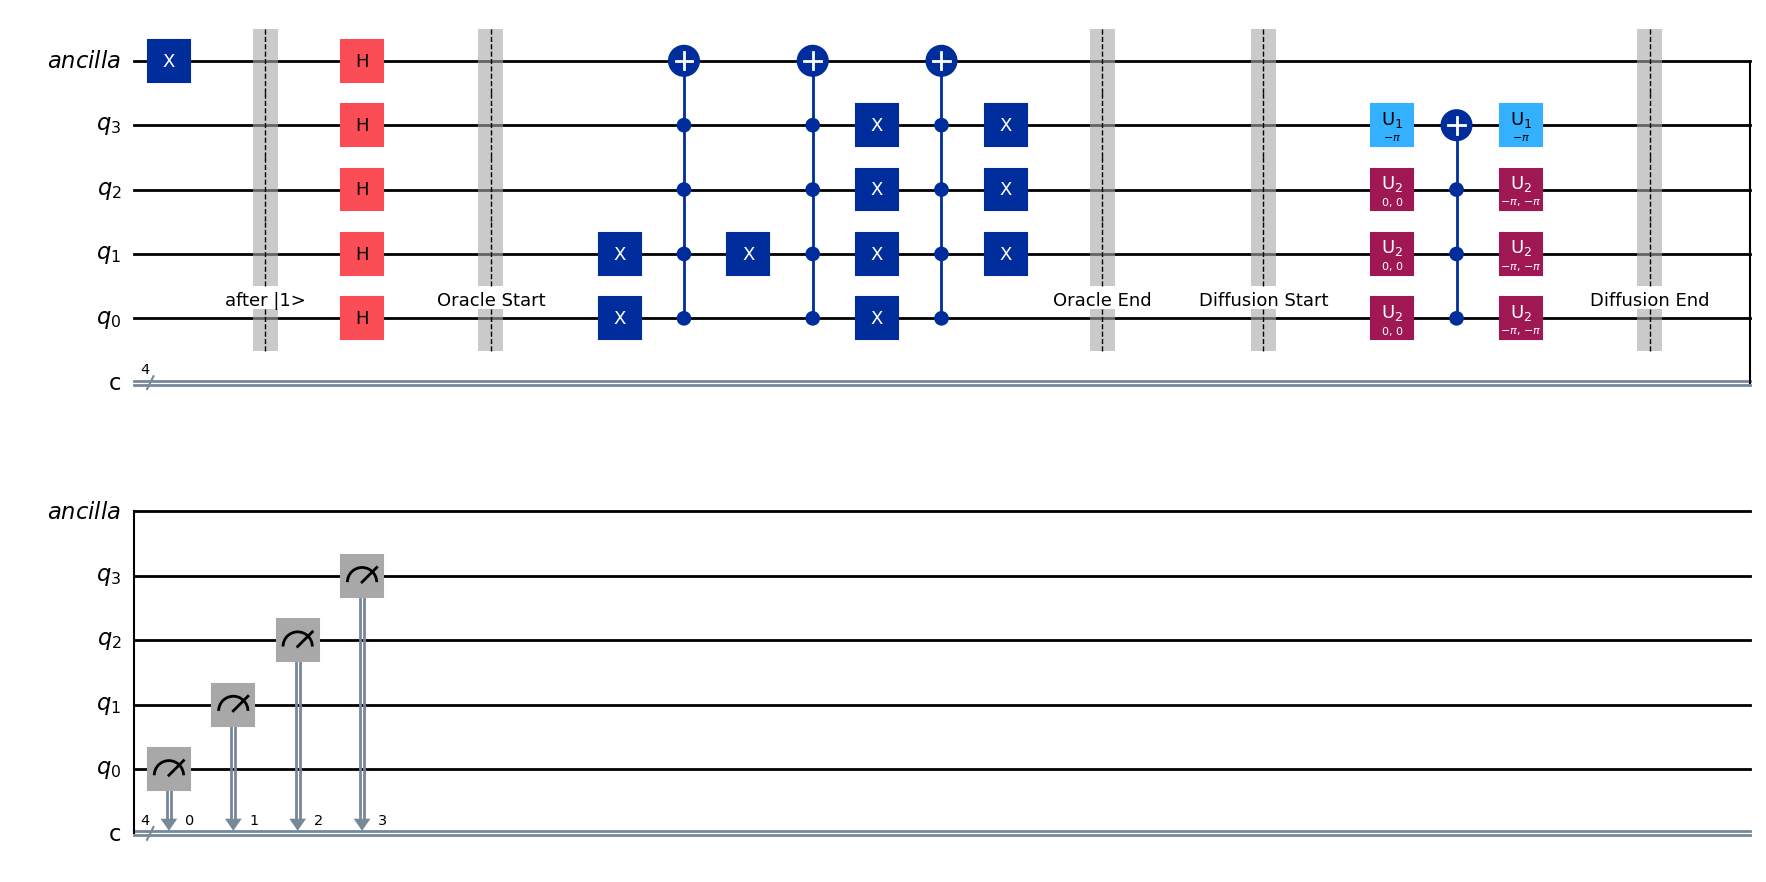

{'0011': 3, '1100': 308, '1110': 323, '0001': 335, '1101': 7, '0100': 9, '1011': 4, '0111': 1, '1000': 3, '1010': 5, '0010': 6, '0101': 3, '1001': 5, '1111': 8, '0000': 2, '0110': 2}


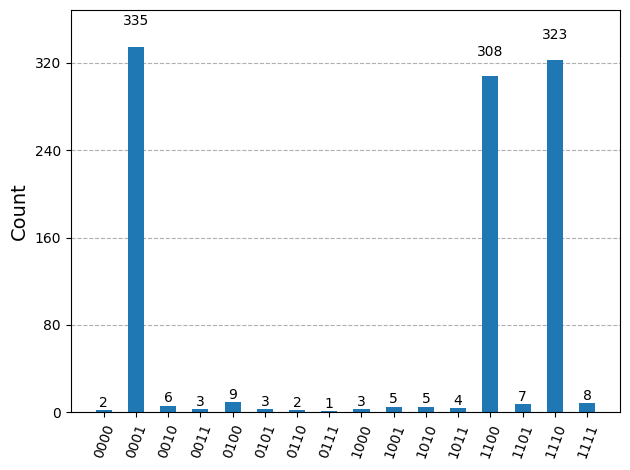

In [ ]:
def multi_target_oracle(circuit, q_reg, ancilla, targets, n_qubits): #Multi-target Oracle
    circuit.barrier(label='Oracle Start')
    for target_pos in targets:
        target_binary = format(target_pos, f'0{n_qubits}b')
        for i, bit in enumerate(target_binary):
            if bit == '0':
                circuit.x(q_reg[i])
        
        # Apply multi-controlled X gate to flip ancilla
        if n_qubits == 1:
            circuit.cx(q_reg[0], ancilla[0])
        elif n_qubits == 2:
            circuit.ccx(q_reg[0], q_reg[1], ancilla[0])
        else:
            circuit.mcx(q_reg, ancilla[0])
        
        # Undo X gates
        for i, bit in enumerate(target_binary):
            if bit == '0':
                circuit.x(q_reg[i])
    circuit.barrier(label='Oracle End')
    return circuit

def diffusion_operator(circuit, q_reg, n_qubits): #Diffusion
    circuit.barrier(label='Diffusion Start')
    circuit.h(q_reg)
    circuit.x(q_reg)
    if n_qubits == 1:
        circuit.z(q_reg[0])
    elif n_qubits == 2:
        circuit.h(q_reg[1])
        circuit.cx(q_reg[0], q_reg[1])
        circuit.h(q_reg[1])
    else:
        circuit.h(q_reg[-1])
        circuit.mcx(q_reg[:-1], q_reg[-1])
        circuit.h(q_reg[-1])
    circuit.x(q_reg)
    circuit.h(q_reg)
    circuit.barrier(label='Diffusion End')
    return circuit

q = QuantumRegister(n_qubits, 'q')
ancilla = QuantumRegister(1, 'ancilla')
c = ClassicalRegister(n_qubits, 'c')
grover_circuit = QuantumCircuit(q, ancilla, c)
grover_circuit.x(ancilla[0])
grover_circuit.barrier(label='after |1>')
grover_circuit.h(q)
grover_circuit.h(ancilla[0])

for iteration in range(optimal_iterations):
    multi_target_oracle(grover_circuit, q, ancilla, target, n_qubits) #Oracle
    diffusion_operator(grover_circuit, q, n_qubits)

grover_circuit.measure(q, c)

sim = AerSimulator()
compiled_circuit = transpile(grover_circuit, sim)
display(compiled_circuit.draw(output='mpl',reverse_bits=True,cregbundle=True))

job = sim.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
display(plot_histogram(counts))

